# Persistency of Drug Prediction

#By :**Sourour Cherif**
#Mail :Sourour.cherif@esprit.tn 
#**Data Science Engineering Student** 
#**Esprit Tunisia**


**Problem Statement:**

One of the challenge for all Pharmaceutical companies is to understand the persistency of drug as per the physician prescription. To solve this problem ABC pharma company approached an analytics company to automate this process of identification.

**ML Problem:**

With an objective to gather insights on the factors that are impacting the persistency, build a classification for the given dataset.

**Target Variable:** Persistency_Flag

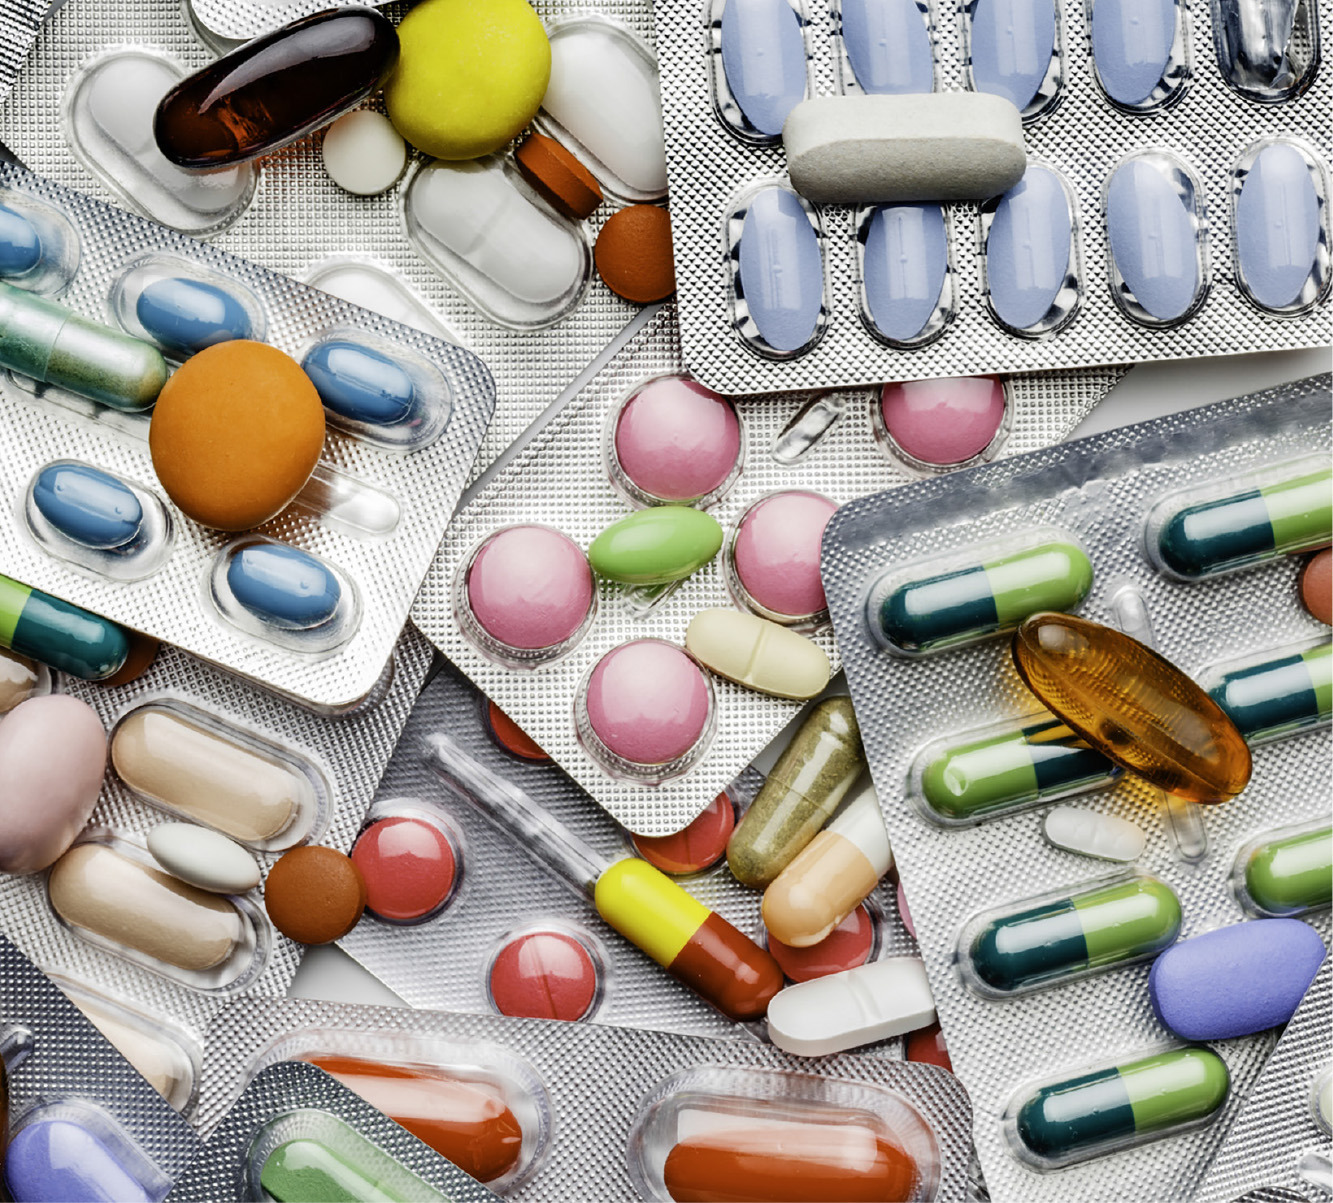

# **Libraries**

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np
# import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
# import statsmodels.api as sm
import seaborn as sns
sns.set()

# **Load the data**

In [ ]:
# Convert the xlsx file to csv

# Read and store content of the excel file 
read_file = pd.read_excel ("Healthcare_dataset.xlsx", 'Dataset')
  
# Write the dataframe object into csv file
read_file.to_csv ("Healthcare_dataset.csv", 
                  index = None,
                  header=True)

# **Data Understanding**

In [ ]:
# Read the csv dataset
data = pd.read_csv('Healthcare_dataset.csv')

# Drop the ID variable
data = data.drop(["Ptid"], axis=1)

data.head()

,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,Gluco_Record_Prior_Ntm,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,...,N,N,N,N,N,N,N,N,N,0
1,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,...,N,N,N,N,N,N,N,N,N,0
2,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,...,N,Y,N,N,N,N,N,N,N,2
3,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,...,N,N,N,N,N,N,N,N,N,1
4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,Y,...,N,N,N,N,N,N,N,N,N,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424 entries, 0 to 3423
Data columns (total 68 columns):
 #   Column                                                              Non-Null Count  Dtype 
---  ------                                                              --------------  ----- 
 0   Persistency_Flag                                                    3424 non-null   object
 1   Gender                                                              3424 non-null   object
 2   Race                                                                3424 non-null   object
 3   Ethnicity                                                           3424 non-null   object
 4   Region                                                              3424 non-null   object
 5   Age_Bucket                                                          3424 non-null   object
 6   Ntm_Speciality                                                      3424 non-null   object
 7   Ntm_Specialist_Flag     

In [ ]:
data.describe()

,Dexa_Freq_During_Rx,Count_Of_Risks
count,3424.000000,3424.000000
mean,3.016063,1.239486
std,8.136545,1.094914
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,1.000000
75%,3.000000,2.000000
max,146.000000,7.000000


In [ ]:
print(data.columns.unique)

<bound method Index.unique of Index(['Persistency_Flag', 'Gender', 'Race', 'Ethnicity', 'Region',
       'Age_Bucket', 'Ntm_Speciality', 'Ntm_Specialist_Flag',
       'Ntm_Speciality_Bucket', 'Gluco_Record_Prior_Ntm',
       'Gluco_Record_During_Rx', 'Dexa_Freq_During_Rx', 'Dexa_During_Rx',
       'Frag_Frac_Prior_Ntm', 'Frag_Frac_During_Rx', 'Risk_Segment_Prior_Ntm',
       'Tscore_Bucket_Prior_Ntm', 'Risk_Segment_During_Rx',
       'Tscore_Bucket_During_Rx', 'Change_T_Score', 'Change_Risk_Segment',
       'Adherent_Flag', 'Idn_Indicator', 'Injectable_Experience_During_Rx',
       'Comorb_Encounter_For_Screening_For_Malignant_Neoplasms',
       'Comorb_Encounter_For_Immunization',
       'Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx',
       'Comorb_Vitamin_D_Deficiency',
       'Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified',
       'Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx',
       'Comorb_Long_Term_Current_Drug_Therapy', 'Comorb_D

# Data Cleaning

In [ ]:
# Total number of missing values
data.isnull().sum().sum()

0

No Missing Values

In [ ]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3419    False
3420    False
3421    False
3422    False
3423    False
Length: 3424, dtype: bool

In [ ]:
duplicate=data[data.duplicated()]
duplicate

,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,Gluco_Record_Prior_Ntm,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
103,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,...,N,N,N,N,N,N,N,N,N,0
143,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,...,N,N,N,N,N,N,N,N,N,0
1403,Non-Persistent,Female,Caucasian,Not Hispanic,South,<55,Unknown,Others,OB/GYN/Others/PCP/Unknown,N,...,N,N,N,N,N,N,N,N,N,0
1891,Non-Persistent,Female,Caucasian,Not Hispanic,South,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,...,N,N,Y,N,N,N,N,N,N,2
2685,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,...,N,N,N,N,N,N,N,N,N,0
2714,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,...,N,N,N,N,N,N,N,N,N,0


In [ ]:
data.drop_duplicates()

,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,Gluco_Record_Prior_Ntm,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,...,N,N,N,N,N,N,N,N,N,0
1,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,...,N,N,N,N,N,N,N,N,N,0
2,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,...,N,Y,N,N,N,N,N,N,N,2
3,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,...,N,N,N,N,N,N,N,N,N,1
4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,Y,...,N,N,N,N,N,N,N,N,N,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3419,Persistent,Female,Caucasian,Not Hispanic,South,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,...,N,N,Y,N,N,N,N,N,N,1
3420,Persistent,Female,Caucasian,Not Hispanic,South,>75,Unknown,Others,OB/GYN/Others/PCP/Unknown,N,...,N,N,N,N,N,N,N,N,N,0
3421,Persistent,Female,Caucasian,Not Hispanic,South,>75,ENDOCRINOLOGY,Specialist,Endo/Onc/Uro,N,...,N,N,Y,N,N,N,N,N,N,1
3422,Non-Persistent,Female,Caucasian,Not Hispanic,South,55-65,Unknown,Others,OB/GYN/Others/PCP/Unknown,N,...,N,N,N,N,N,N,N,N,N,0


In [ ]:
# Dimension of the dataset
data.shape

(3424, 68)

In [ ]:
# Standardize column names

columns = list(data.columns)

for item in columns:
    special_characters = "!@#$%^&*()-+?=,<>/"
    
    for character in special_characters:
        if character in item:
            print(f"Feature: {item}, is not well formatted")

Feature: Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx, is not well formatted


In [ ]:
# Remove the "," from this feature name

data["Comorb_Encntr_For_General_Exam_W_O_Complaint_Susp_Or_Reprtd_Dx"] = data["Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx"]
data = data.drop(["Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx"], axis=1)
data.shape

(3424, 68)

In [ ]:
# Numeric Columns
numeric_col = list(data._get_numeric_data().columns)
numeric_col

['Dexa_Freq_During_Rx', 'Count_Of_Risks']

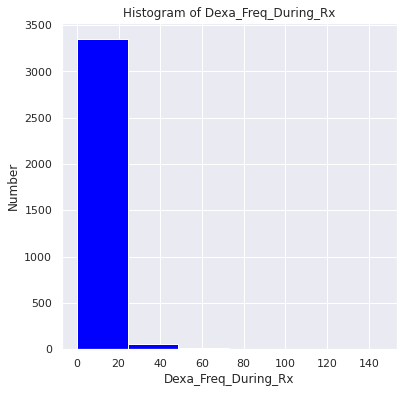

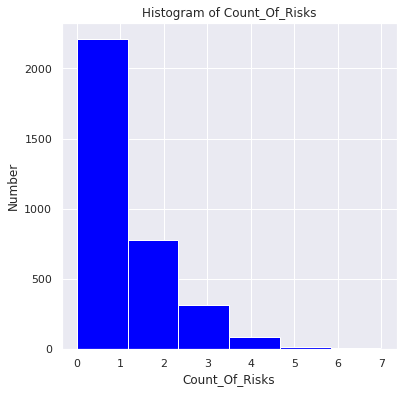

In [ ]:
# ploting histogram for numerical columns
def plot_histogram(data, cols, bins=6):
    for col in cols:
        fig = plt.figure(figsize=(6,6))
        ax= fig.gca()
        data[col].plot.hist(ax = ax, bins = bins, color = 'blue')
        ax.set_title('Histogram of ' + col)
        ax.set_xlabel(col)
        ax.set_ylabel('Number')
        plt.show()
plot_histogram(data, numeric_col)

# **Measuring skewness and kurtosis of numerical columns**

In [ ]:
# PERFPROMING THE CORRELATION BEFORE OUTLIERS AND SKEW DATA
#correlation using numpy
np.corrcoef(data['Dexa_Freq_During_Rx'],data['Count_Of_Risks'])

array([[1.        , 0.01396392],
       [0.01396392, 1.        ]])

In [ ]:
def measure_skew_kurtosis(cols):
    for col in cols:
        print(col)
        result = data[[col]].agg(['skew', 'kurtosis']).transpose()
        print(result)
measure_skew_kurtosis(numeric_col)

Dexa_Freq_During_Rx
                        skew   kurtosis
Dexa_Freq_During_Rx  6.80873  74.758378
Count_Of_Risks
                    skew  kurtosis
Count_Of_Risks  0.879791  0.900486


In [ ]:
#skew and kurtosis values
data.agg(['skew', 'kurtosis']).transpose()

,skew,kurtosis
Dexa_Freq_During_Rx,6.808730,74.758378
Count_Of_Risks,0.879791,0.900486


In [ ]:
data[['log_Dexa','log_Count_Risks']] = np.log1p(data[['Dexa_Freq_During_Rx','Count_Of_Risks']])

In [ ]:
data[['log_Dexa','log_Count_Risks']]

,log_Dexa,log_Count_Risks
0,0.000000,0.000000
1,0.000000,0.000000
2,0.000000,1.098612
3,0.000000,0.693147
4,0.000000,0.693147
...,...,...
3419,0.000000,0.693147
3420,0.000000,0.000000
3421,2.079442,0.693147
3422,0.000000,0.000000


In [ ]:
#Checking skew after transformation
data.agg(['skew', 'kurtosis']).transpose()

,skew,kurtosis
Dexa_Freq_During_Rx,6.808730,74.758378
Count_Of_Risks,0.879791,0.900486
log_Dexa,1.405860,0.624570
log_Count_Risks,-0.091583,-1.006414


### Detect and Remove Outliers

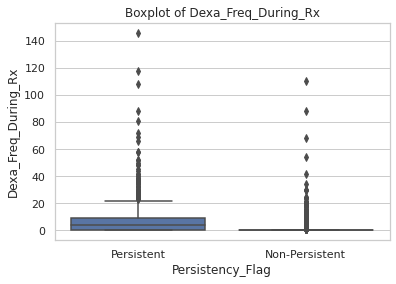

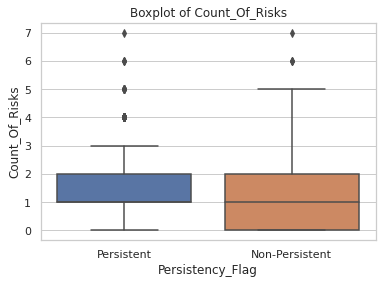

In [ ]:
# creating a box plot of numerical columns against persitency flag to identify outliers
def boxplot(data, cols):
    for col in cols:
        sns.set_style('whitegrid')
        sns.boxplot(x='Persistency_Flag', y=col, data=data)
        plt.title('Boxplot of ' + col)
        plt.ylabel(col) #setting text for y axis
        plt.show()
boxplot(data, numeric_col)

In [ ]:
data['Dexa_Freq_During_Rx'].value_counts()

0      2488
5       114
6       107
7        93
8        71
4        68
10       55
12       52
3        46
14       38
9        32
11       30
1        24
2        24
13       19
20       15
16       14
18       14
22       13
26       10
24       10
15        9
30        7
17        7
28        7
21        7
36        5
19        3
42        3
32        3
34        3
52        2
48        2
58        2
25        2
39        2
88        2
54        1
146       1
50        1
35        1
44        1
108       1
72        1
40        1
68        1
45        1
38        1
69        1
118       1
66        1
110       1
33        1
23        1
27        1
81        1
37        1
29        1
Name: Dexa_Freq_During_Rx, dtype: int64

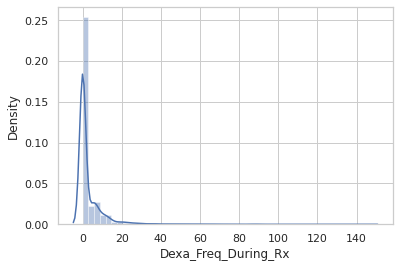

In [ ]:
# Spot Outliers for Dexa_Freq_During_Rx
sns.distplot(data['Dexa_Freq_During_Rx'])

In [ ]:
# To remove the 99th percentile
q = data['Dexa_Freq_During_Rx'].quantile(0.99)
data_1 = data[data['Dexa_Freq_During_Rx']<q]
data_1.describe()

,Dexa_Freq_During_Rx,Count_Of_Risks,log_Dexa,log_Count_Risks
count,3389.000000,3389.000000,3389.000000,3389.000000
mean,2.440248,1.240484,0.572915,0.685941
std,5.183446,1.095904,0.997375,0.499826
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.693147
75%,3.000000,2.000000,1.386294,1.098612
max,34.000000,7.000000,3.555348,2.079442


In [ ]:
data_1['Dexa_Freq_During_Rx'].value_counts()

0     2488
5      114
6      107
7       93
8       71
4       68
10      55
12      52
3       46
14      38
9       32
11      30
1       24
2       24
13      19
20      15
16      14
18      14
22      13
26      10
24      10
15       9
30       7
28       7
17       7
21       7
19       3
34       3
32       3
25       2
27       1
23       1
33       1
29       1
Name: Dexa_Freq_During_Rx, dtype: int64

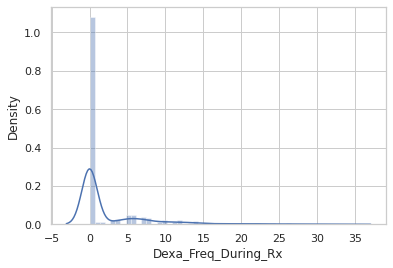

In [ ]:
sns.distplot(data_1['Dexa_Freq_During_Rx'])

In [ ]:
data_1['Count_Of_Risks'].value_counts()

1    1228
0     960
2     773
3     315
4      90
5      15
6       6
7       2
Name: Count_Of_Risks, dtype: int64

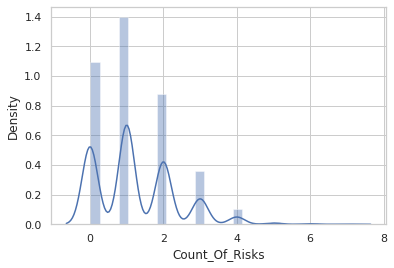

In [ ]:
# Spot Outliers for Count_Of_Risks
sns.distplot(data_1['Count_Of_Risks'])

In [ ]:
# To remove the 99th percentile
q = data_1['Count_Of_Risks'].quantile(0.99)
data_2 = data_1[data_1['Count_Of_Risks']<q]
data_2.describe()

,Dexa_Freq_During_Rx,Count_Of_Risks,log_Dexa,log_Count_Risks
count,3276.000000,3276.000000,3276.000000,3276.000000
mean,2.434066,1.135226,0.567537,0.652349
std,5.215384,0.946362,0.996754,0.473482
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.693147
75%,2.000000,2.000000,1.098612,1.098612
max,34.000000,3.000000,3.555348,1.386294


In [ ]:
data_2['Count_Of_Risks'].value_counts()

1    1228
0     960
2     773
3     315
Name: Count_Of_Risks, dtype: int64

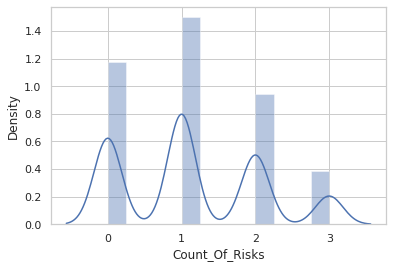

In [ ]:
sns.distplot(data_2['Count_Of_Risks'])

In [ ]:
# Data without outliers
data = data_2

In [ ]:
# Data containing only categorical variables
categoric_data = data.drop(numeric_col, axis=1)

In [ ]:
# Categorical Columns
cat_columns = list(categoric_data.columns)

In [ ]:
# Inspect the unique values of the categorical variables

for item in cat_columns:
    print(f"{item}: {categoric_data[item].unique()}")
    print("")

Persistency_Flag: ['Persistent' 'Non-Persistent']

Gender: ['Male' 'Female']

Race: ['Caucasian' 'Asian' 'Other/Unknown' 'African American']

Ethnicity: ['Not Hispanic' 'Hispanic' 'Unknown']

Region: ['West' 'Midwest' 'South' 'Other/Unknown' 'Northeast']

Age_Bucket: ['>75' '55-65' '65-75' '<55']

Ntm_Speciality: ['GENERAL PRACTITIONER' 'Unknown' 'ENDOCRINOLOGY' 'RHEUMATOLOGY'
 'ONCOLOGY' 'PATHOLOGY' 'OBSTETRICS AND GYNECOLOGY'
 'PSYCHIATRY AND NEUROLOGY' 'ORTHOPEDIC SURGERY'
 'PHYSICAL MEDICINE AND REHABILITATION' 'SURGERY AND SURGICAL SPECIALTIES'
 'PULMONARY MEDICINE' 'HEMATOLOGY & ONCOLOGY' 'PEDIATRICS' 'UROLOGY'
 'PAIN MEDICINE' 'NEUROLOGY' 'RADIOLOGY' 'GASTROENTEROLOGY'
 'EMERGENCY MEDICINE' 'PODIATRY' 'OPHTHALMOLOGY' 'OCCUPATIONAL MEDICINE'
 'TRANSPLANT SURGERY' 'PLASTIC SURGERY' 'CLINICAL NURSE SPECIALIST'
 'OTOLARYNGOLOGY' 'HOSPITAL MEDICINE' 'ORTHOPEDICS' 'NEPHROLOGY'
 'GERIATRIC MEDICINE' 'HOSPICE AND PALLIATIVE MEDICINE'
 'OBSTETRICS & OBSTETRICS & GYNECOLOGY & OBSTETRICS &

In [ ]:
# PERFPROMING THE CORRELATION BEFORE OUTLIERS AND SKEW DATA
#correlation using numpy
np.corrcoef(data['Dexa_Freq_During_Rx'],data['Count_Of_Risks'])

array([[1.        , 0.04935025],
       [0.04935025, 1.        ]])

In [ ]:
# The target variable
data["Persistency_Flag"].unique()

array(['Persistent', 'Non-Persistent'], dtype=object)

In [ ]:
# Encode the Target variable
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
data["Persistency_Flag"] = lb_make.fit_transform(data["Persistency_Flag"])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Note: 1 = Persistent, 0 = Non-Persistent 

In [ ]:
data["Persistency_Flag"].unique()

array([1, 0])